<a href="https://colab.research.google.com/github/KayalvizhiT513/Learning-Computer-Vision/blob/main/stereo_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import itertools
import numpy as np
from matplotlib import pyplot as plt

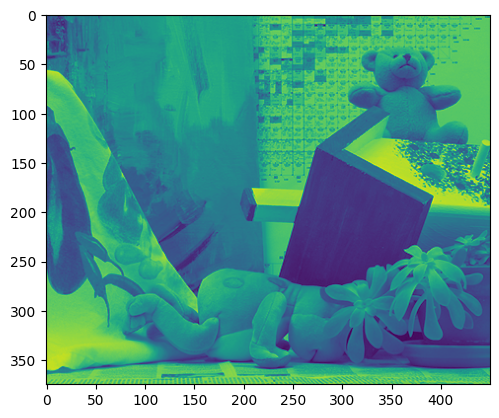

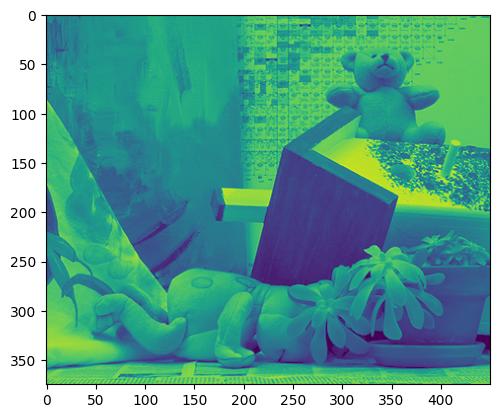

In [27]:
# Loading the left / right images

imgL = cv2.imread('im2.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('im6.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(imgL)
plt.figure()
plt.imshow(imgR)

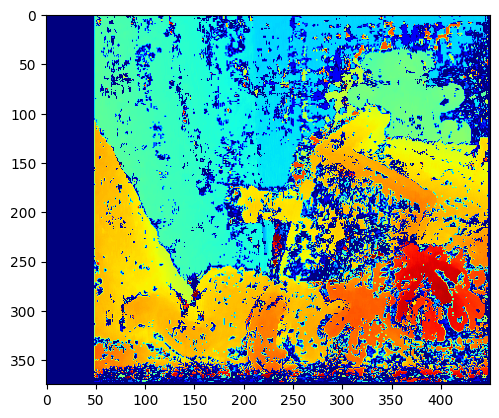

In [28]:
# Disparity estimation

stereo = cv2.StereoBM.create(numDisparities=48, blockSize=5)
disparity = stereo.compute(imgL,imgR)

cv2.imwrite('diparity-output.png', disparity)

plt.figure()
plt.imshow(disparity,cmap='jet')

nrows, ncols = disparity.shape
disparity = disparity.reshape(-1, nrows * ncols)

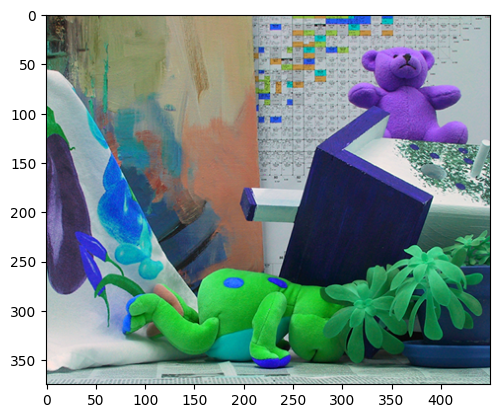

In [34]:
imgC = cv2.imread('im2.png', cv2.IMREAD_COLOR)
plt.imshow(imgC)

In [30]:
# filtering invalid disparities (-1)
# setting up row, col vectors

yx = list(itertools.product(range(nrows), range(ncols)))

x, y = list(zip(*yx))
x = np.array(x).reshape(-1, nrows*ncols)
y = np.array(y).reshape(-1, nrows*ncols)
print(x, x.shape)
print(y, y.shape)

mask = disparity > 0
disparity = disparity[mask] * 0.1

x = x[mask]
y = y[mask]

[[  0   0   0 ... 374 374 374]] (1, 168750)
[[  0   1   2 ... 447 448 449]] (1, 168750)


In [35]:
# Split the color channels
b, g, r = cv2.split(imgC)

# Flatten the channels to match the structure of other arrays
r = r.flatten()
g = g.flatten()
b = b.flatten()

# Apply the mask after splitting
r = r[mask.flatten()]
g = g[mask.flatten()]
b = b[mask.flatten()]


In [36]:
# Converting disparities to point cloud

baseline = 0.1
focal_length = 150

zw = (baseline * focal_length) / disparity

cx = ncols / 2
cy = nrows / 2

xw = (x - cx) * zw / focal_length
yw = (y - cy) * zw / focal_length

data = np.stack([-xw, yw, zw, r, g, b], axis=0).T
np.savetxt('point.asc', data)